<a href="https://colab.research.google.com/github/Surajk86808/ML-code/blob/main/Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline


In [6]:
# creating quad equation for dataset
X = 6 * np.random.rand(100,1)-3
y = 0.5 * X**2 + 1.5*X + 2 + np.random.randn(100,1)
# quadratic euation = 1/2*x^2 + 1.5*x + 2 + outliers


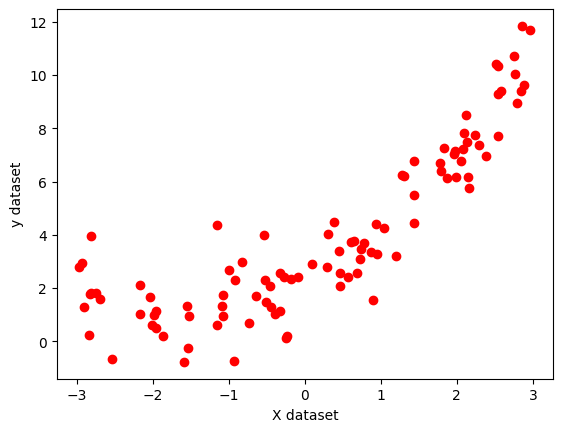

In [8]:
plt.scatter(X,y,color = 'red')
plt.xlabel('X dataset')
plt.ylabel('y dataset')
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 42)

In [13]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(X_train,y_train)

LinearRegression()

In [17]:
from sklearn.metrics import r2_score
score = r2_score(y_test,model1.predict(X_test))
print(score)

0.6613516555860802


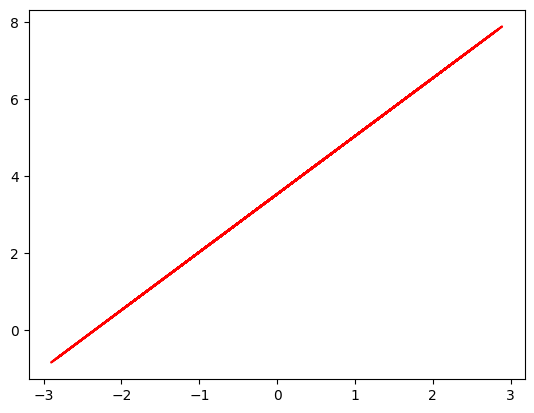

In [19]:
plt.plot(X_train,model1.predict(X_train),color='red')

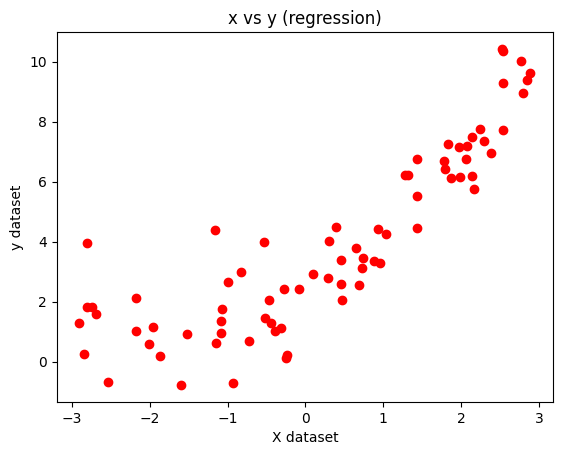

In [22]:
plt.scatter(X_train,y_train,color='red')
plt.xlabel('X dataset')
plt.ylabel('y dataset')
plt.title('x vs y (regression)')
plt.show()

In [25]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2,include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# WHAT IF DEGREE IS 3 OR 4 OR SO ON

In [26]:
X_train_poly

array([[ 1.00000000e+00,  4.68585045e-01,  2.19571945e-01],
       [ 1.00000000e+00,  9.53402575e-01,  9.08976470e-01],
       [ 1.00000000e+00,  1.43683494e+00,  2.06449466e+00],
       [ 1.00000000e+00, -1.15460516e+00,  1.33311308e+00],
       [ 1.00000000e+00,  1.97510548e+00,  3.90104168e+00],
       [ 1.00000000e+00,  2.88887092e+00,  8.34557520e+00],
       [ 1.00000000e+00,  8.74675528e-01,  7.65057280e-01],
       [ 1.00000000e+00,  1.77600339e+00,  3.15418804e+00],
       [ 1.00000000e+00,  7.37129741e-01,  5.43360256e-01],
       [ 1.00000000e+00,  2.84304362e+00,  8.08289705e+00],
       [ 1.00000000e+00, -8.42175611e-02,  7.09259760e-03],
       [ 1.00000000e+00,  2.28868474e+00,  5.23807786e+00],
       [ 1.00000000e+00,  2.76806899e+00,  7.66220591e+00],
       [ 1.00000000e+00, -7.31073832e-01,  5.34468948e-01],
       [ 1.00000000e+00, -1.16149385e+00,  1.34906796e+00],
       [ 1.00000000e+00,  1.98384610e+00,  3.93564534e+00],
       [ 1.00000000e+00, -1.52160237e+00

In [28]:
from sklearn.metrics  import r2_score
regression_model = LinearRegression()
regression_model.fit(X_train_poly,y_train)
y_predict = regression_model.predict(X_test_poly)
score = r2_score(y_test,y_predict)
print(score)

0.9174275040036113


In [29]:
regression_model.coef_
# why 3 coeefiecint => as 3 input features

array([[0.        , 1.45808138, 0.40876549]])

In [30]:
regression_model.intercept_

array([2.3375382])

<function matplotlib.pyplot.show(close=None, block=None)>

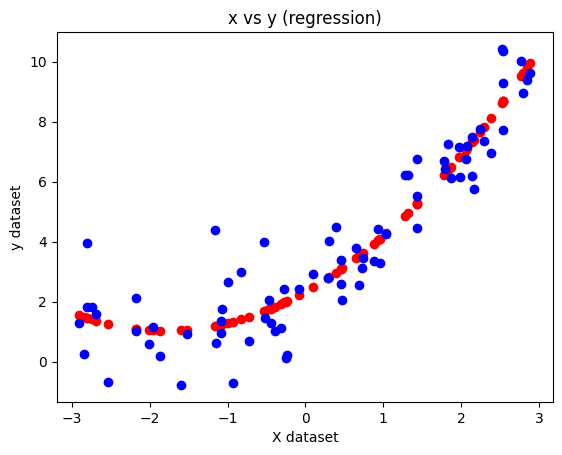

In [32]:
plt.scatter(X_train,regression_model.predict(X_train_poly),color='red')
plt.scatter(X_train,y_train,color='blue')
plt.xlabel('X dataset')
plt.ylabel('y dataset')
plt.title('x vs y (regression)')
plt.show

In [33]:
# prediction of new data
X_new = np.linspace(-3,3,100).reshape(100,1)
X_new_poly = poly.transform(X_new)
X_new_poly

array([[ 1.00000000e+00, -3.00000000e+00,  9.00000000e+00],
       [ 1.00000000e+00, -2.93939394e+00,  8.64003673e+00],
       [ 1.00000000e+00, -2.87878788e+00,  8.28741965e+00],
       [ 1.00000000e+00, -2.81818182e+00,  7.94214876e+00],
       [ 1.00000000e+00, -2.75757576e+00,  7.60422406e+00],
       [ 1.00000000e+00, -2.69696970e+00,  7.27364555e+00],
       [ 1.00000000e+00, -2.63636364e+00,  6.95041322e+00],
       [ 1.00000000e+00, -2.57575758e+00,  6.63452709e+00],
       [ 1.00000000e+00, -2.51515152e+00,  6.32598714e+00],
       [ 1.00000000e+00, -2.45454545e+00,  6.02479339e+00],
       [ 1.00000000e+00, -2.39393939e+00,  5.73094582e+00],
       [ 1.00000000e+00, -2.33333333e+00,  5.44444444e+00],
       [ 1.00000000e+00, -2.27272727e+00,  5.16528926e+00],
       [ 1.00000000e+00, -2.21212121e+00,  4.89348026e+00],
       [ 1.00000000e+00, -2.15151515e+00,  4.62901745e+00],
       [ 1.00000000e+00, -2.09090909e+00,  4.37190083e+00],
       [ 1.00000000e+00, -2.03030303e+00

In [34]:
Y_new =  regression_model.predict(X_new_poly)
Y_new = Y_new.reshape(100,1)

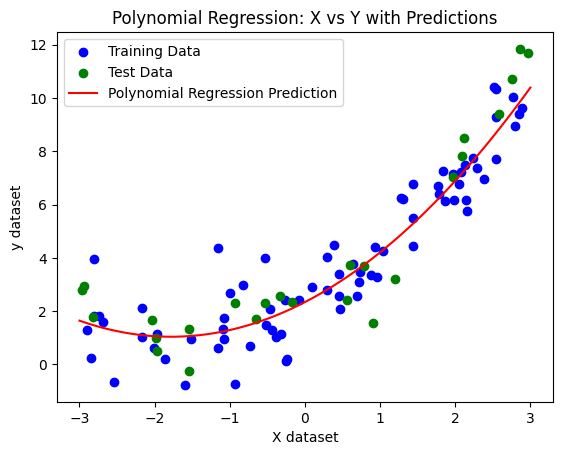

In [36]:
# Plot the original training data
plt.scatter(X_train, y_train, color='blue', label='Training Data')

# Plot the original test data
plt.scatter(X_test, y_test, color='green', label='Test Data')

# Plot the predicted values for the new data range
plt.plot(X_new, Y_new, color='red', label='Polynomial Regression Prediction')

plt.xlabel('X dataset')
plt.ylabel('y dataset')
plt.title('Polynomial Regression: X vs Y with Predictions')
plt.legend()
plt.show()